In [11]:
from bioblue.nb import *
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output
from bioblue.plot import cm

In [2]:
import pickle
localscratch = Path("./tmp") # Path(os.environ["LOCALSCRATCH"])

with open(localscratch / "masks.pickle", 'rb') as picklefile:
    images = pickle.load(picklefile)

In [10]:
im1 = images["s4-2h"][:,:,:1774]
im2 = images["s4-13m"][3:529,307:2359,127:1901]
mask = images["s4-2h-bin"][:,:,:1774]

print(im1.shape, im2.shape, mask.shape)
min_shape = tuple(min(x1,x2) for x1,x2 in zip(im1.shape, im2.shape))

(526, 2052, 1774) (526, 2052, 1774) (526, 2052, 1774)


In [ ]:
look = ["s4-2h", "s4-1h"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,8), gridspec_kw={'wspace': 0.1, 'width_ratios':[0.1,0.45,0.45]})
for j, ax in enumerate(axs):
    ax.imshow(images["s4-2h"].take(100, axis=j), cmap="gray", vmin=0, vmax=255)
plt.show()

def image_slicer(x,y,z):
    clear_output(wait=True)
    look = ["s4-1h"]
    fig, axs = plt.subplots(nrows=len(look), ncols=3, figsize=(30,8), gridspec_kw={'wspace': 0.1, 'width_ratios':[0.1,0.45,0.45]}, squeeze=False)
    xyz = [x,y,z]
    for i, axi in enumerate(axs):
        for j, ax in enumerate(axi):
            ax.imshow(images[look[i]].take(xyz[j], axis=j), cmap="gray", vmin=0, vmax=255)
    plt.show()

maxs = images["s4-1h"].shape
interact(image_slicer,x=(0,maxs[0]),y=(0,maxs[1]),z=(0,maxs[2]))

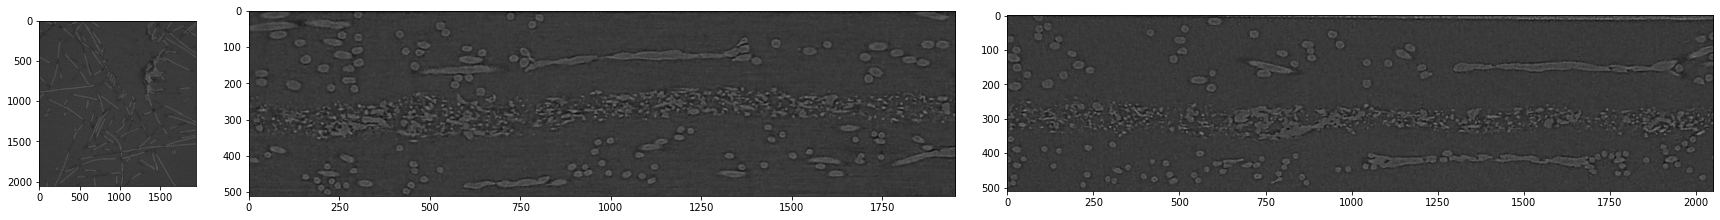

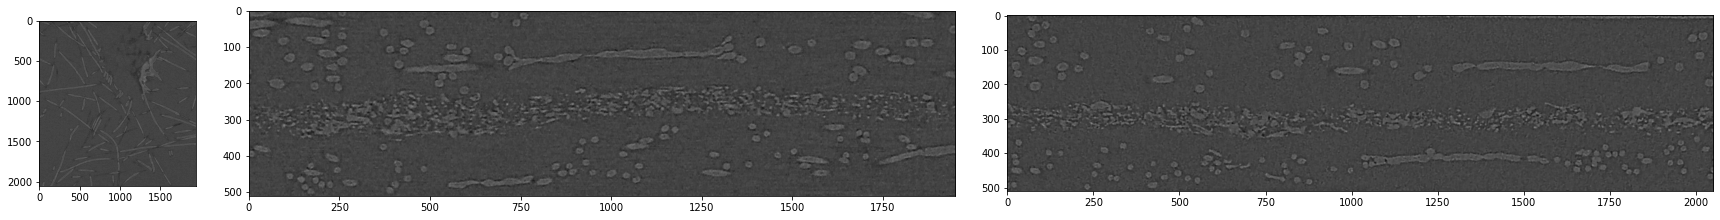

In [32]:
delta = [(1,0,0), (0,100,50)]
slice_num = []
for i, im in enumerate([im1, im2]):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,8), gridspec_kw={'wspace': 0.1, 'width_ratios':[0.1,0.45,0.45]})
    for j, ax in enumerate(axs):
        d = delta[i]
        ax.imshow(im[d[0]:d[0]+min_shape[0],d[1]:d[1]+min_shape[1],d[2]:d[2]+min_shape[2]].take(100, axis=j), cmap="gray", vmin=0, vmax=255)
    plt.show()

In [13]:
def show_img(im, mask=None, i=0):
    clear_output(wait=True)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(im[:,i,:], cmap="gray")
    if mask is not None:
        plt.imshow(mask[:,i,:], cmap=cm.default, alpha=0.6)
    plt.show()

inter1 = interactive(show_img, im=fixed(im1), mask=fixed(None), i=widgets.IntSlider(min=0, max=im1.shape[1]-1))
inter2 = interactive(show_img, im=fixed(im2), mask=fixed(mask), i=widgets.IntSlider(min=0, max=im2.shape[1]-1))
display(widgets.HBox([inter1, inter2]))

In [5]:
def show_img(im, i=0):
    clear_output(wait=True)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(im[:,:,i])
    plt.show()

inter1 = interactive(show_img, im=fixed(im1), i=widgets.IntSlider(min=0, max=im1.shape[2]-1))
inter2 = interactive(show_img, im=fixed(im2), i=widgets.IntSlider(min=0, max=im2.shape[2]-1))
display(widgets.HBox([inter1, inter2]))

In [15]:
def show_img(im, mask=None, i=0):
    clear_output(wait=True)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(im[i,:,:], cmap="gray")
    if mask is not None:
        plt.imshow(mask[i,:,:], cmap=cm.default, alpha=0.6)
    plt.show()


inter1 = interactive(show_img, im=fixed(im1), mask=fixed(None), i=widgets.IntSlider(min=0, max=im1.shape[0]-1))
inter2 = interactive(show_img, im=fixed(im2), mask=fixed(mask), i=widgets.IntSlider(min=0, max=im2.shape[0]-1))
display(widgets.HBox([inter1, inter2]))

In [11]:
im1_roi = im1[3:514,0:2051,0:1950]
im2_roi = im2[0:511,100:2151,6:1956]
# seems OKOK !

(511, 2051, 1950) (511, 2051, 1950)


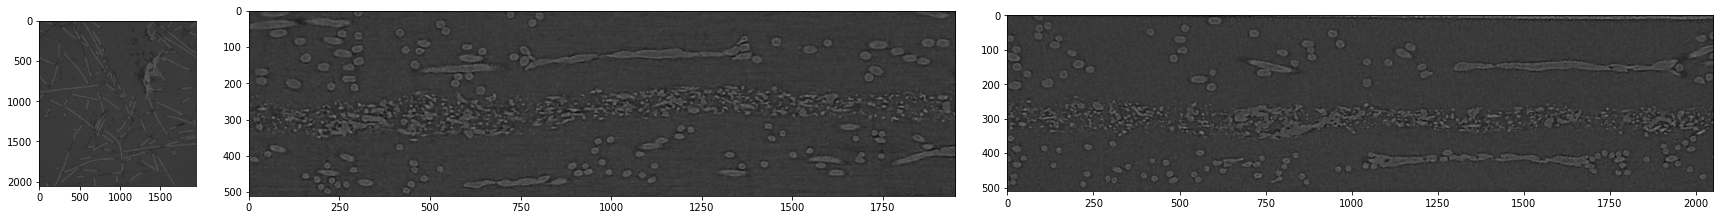

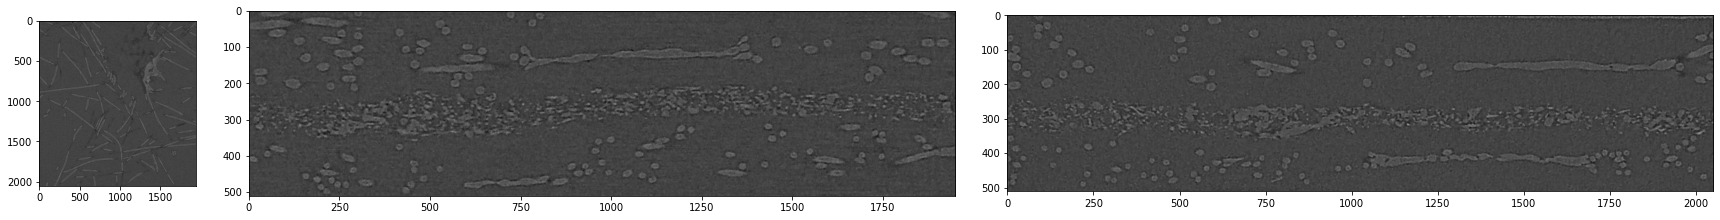

In [13]:
print(im1_roi.shape, im2_roi.shape)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,8), gridspec_kw={'wspace': 0.1, 'width_ratios':[0.1,0.45,0.45]})
for j, ax in enumerate(axs):
    ax.imshow(im1_roi.take(100, axis=j), cmap="gray", vmin=0, vmax=255)
plt.show()
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,8), gridspec_kw={'wspace': 0.1, 'width_ratios':[0.1,0.45,0.45]})
for j, ax in enumerate(axs):
    ax.imshow(im2_roi.take(100, axis=j), cmap="gray", vmin=0, vmax=255)
plt.show()